# 5. Loading  Files with all Abstracts as Text for both Tetracted and Non-retracted Papers 

In [1]:
# Import required libraries

import pandas as pd
import numpy as np

import requests
import csv
import os
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings("ignore")

# Non retracted papers

Reading the csv file with the text of non-retracted papers into a dataframe:

In [2]:

# Relative path to the CSV file for non-retracted papers

file_path = '../data/cellbio_abstracts/cellbio_abstracts_non-retracted_text.csv'

# Load the CSV file into a DataFrame, specifying the pipe '|' as the delimiter

abstract_nonretracted_df = pd.read_csv(file_path, delimiter='|')

# Display information about the DataFrame to understand its structure
abstract_nonretracted_df.info()
abstract_nonretracted_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5063 entries, 0 to 5062
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   abstract_text  5063 non-null   object
 1   target         5063 non-null   int64 
 2   doi            5063 non-null   object
 3   country        5063 non-null   object
 4   year           5063 non-null   int64 
 5   ret_flag       5063 non-null   bool  
dtypes: bool(1), int64(2), object(3)
memory usage: 202.8+ KB


,abstract_text,target,doi,country,year,ret_flag
0,"""Vascular endothelial growth factor receptor-1...",0,10.1371_journal.pone.0065217,CN,2013,False
1,"""Rheumatoid arthritis-fibroblast-like synovioc...",0,10.1016_j.biopha.2017.09.120,CN,2017,False
2,"""Type 1 diabetes mellitus (T1DM) is a systemic...",0,10.1002_ptr.6533,CN,2019,False
3,"""The study was designed to elucidate the regul...",0,10.1002_jcb.29429,CN,2019,False
4,"""Hepatocellular carcinoma (HCC) is the third l...",0,10.1155_2014_486407,TW,2014,False


Removing all rows where "retract" or "withdraw" appear in the abstract text:

In [3]:

# Filter the DataFrame to only include rows where 'ret_flag' is True

ret_flag_nonretracted_df = abstract_nonretracted_df[abstract_nonretracted_df['ret_flag'] == True]

# Info on the filtered DataFrame

ret_flag_nonretracted_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 488 entries, 15 to 5057
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   abstract_text  488 non-null    object
 1   target         488 non-null    int64 
 2   doi            488 non-null    object
 3   country        488 non-null    object
 4   year           488 non-null    int64 
 5   ret_flag       488 non-null    bool  
dtypes: bool(1), int64(2), object(3)
memory usage: 23.4+ KB


In [4]:

# Drop rows where 'ret_flag' is True directly from the main DataFrame

cleaned_nonretracted_df = abstract_nonretracted_df[abstract_nonretracted_df['ret_flag'] != True]

# Display the cleaned DataFrame to verify the rows are dropped

cleaned_nonretracted_df.info()
cleaned_nonretracted_df

<class 'pandas.core.frame.DataFrame'>
Index: 4575 entries, 0 to 5062
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   abstract_text  4575 non-null   object
 1   target         4575 non-null   int64 
 2   doi            4575 non-null   object
 3   country        4575 non-null   object
 4   year           4575 non-null   int64 
 5   ret_flag       4575 non-null   bool  
dtypes: bool(1), int64(2), object(3)
memory usage: 218.9+ KB


,abstract_text,target,doi,country,year,ret_flag
0,"""Vascular endothelial growth factor receptor-1...",0,10.1371_journal.pone.0065217,CN,2013,False
1,"""Rheumatoid arthritis-fibroblast-like synovioc...",0,10.1016_j.biopha.2017.09.120,CN,2017,False
2,"""Type 1 diabetes mellitus (T1DM) is a systemic...",0,10.1002_ptr.6533,CN,2019,False
3,"""The study was designed to elucidate the regul...",0,10.1002_jcb.29429,CN,2019,False
4,"""Hepatocellular carcinoma (HCC) is the third l...",0,10.1155_2014_486407,TW,2014,False
...,...,...,...,...,...,...
5058,"""Notoginsenoside R1 (NGR1) is a neoteric phyto...",0,10.1002_jcb.29282,CN,2019,False
5059,"""Melastoma malabathricum (MM) Linn leaves trad...",0,10.1186_1472-6882-13-222,IN,2013,False
5060,"""A nanodrug delivery system of paclitaxel-meso...",0,10.1186_s11671-017-1826-1,CN,2017,False
5061,"""In the present study hsa-miR-424-5p mimic pl...",0,10.1042_BSR20193800,CN,2020,False


# Retracted papers

Reading the csv file with the text of retracted papaers into a dataframe:

In [5]:

# Relative path to the CSV file

file_path = '../data/cellbio_abstracts/cellbio_abstracts_retracted_text.csv'

# Load the CSV file into a DataFrame, specifying the pipe '|' as the delimiter

abstract_retracted_df = pd.read_csv(file_path, delimiter='|')

# Display information about the DataFrame to understand its structure
abstract_retracted_df.info()
abstract_retracted_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6637 entries, 0 to 6636
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   abstract_text  6637 non-null   object
 1   target         6637 non-null   int64 
 2   doi            6637 non-null   object
 3   country        6637 non-null   object
 4   year           6637 non-null   int64 
 5   ret_flag       6637 non-null   bool  
dtypes: bool(1), int64(2), object(3)
memory usage: 265.9+ KB


,abstract_text,target,doi,country,year,ret_flag
0,"""Vascular endothelial growth factor receptor-1...",1,10.1371_journal.pone.0065217,CN,2013,False
1,"""Rheumatoid arthritis-fibroblast-like synovioc...",1,10.1016_j.biopha.2017.09.120,CN,2017,False
2,"""Type 1 diabetes mellitus (T1DM) is a systemic...",1,10.1002_ptr.6533,CN,2019,False
3,"""The study was designed to elucidate the regul...",1,10.1002_jcb.29429,CN,2019,False
4,"""Hepatocellular carcinoma (HCC) is the third l...",1,10.1155_2014_486407,TW,2014,False



Removing all rows where "retract" or "withdraw" appear in the abstract text:

In [6]:

# Filter the DataFrame to only include rows where 'ret_flag' is True

ret_flag_retracted_df = abstract_retracted_df[abstract_retracted_df['ret_flag'] == True]

# Display the filtered DataFrame

ret_flag_retracted_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 740 entries, 22 to 6628
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   abstract_text  740 non-null    object
 1   target         740 non-null    int64 
 2   doi            740 non-null    object
 3   country        740 non-null    object
 4   year           740 non-null    int64 
 5   ret_flag       740 non-null    bool  
dtypes: bool(1), int64(2), object(3)
memory usage: 35.4+ KB


In [7]:

# Drop rows where 'ret_flag' is True directly from the main DataFrame

cleaned_retracted_df = abstract_retracted_df[abstract_retracted_df['ret_flag'] != True]

# Display the cleaned DataFrame to verify the rows are dropped

cleaned_retracted_df.info()
cleaned_retracted_df

<class 'pandas.core.frame.DataFrame'>
Index: 5897 entries, 0 to 6636
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   abstract_text  5897 non-null   object
 1   target         5897 non-null   int64 
 2   doi            5897 non-null   object
 3   country        5897 non-null   object
 4   year           5897 non-null   int64 
 5   ret_flag       5897 non-null   bool  
dtypes: bool(1), int64(2), object(3)
memory usage: 282.2+ KB


,abstract_text,target,doi,country,year,ret_flag
0,"""Vascular endothelial growth factor receptor-1...",1,10.1371_journal.pone.0065217,CN,2013,False
1,"""Rheumatoid arthritis-fibroblast-like synovioc...",1,10.1016_j.biopha.2017.09.120,CN,2017,False
2,"""Type 1 diabetes mellitus (T1DM) is a systemic...",1,10.1002_ptr.6533,CN,2019,False
3,"""The study was designed to elucidate the regul...",1,10.1002_jcb.29429,CN,2019,False
4,"""Hepatocellular carcinoma (HCC) is the third l...",1,10.1155_2014_486407,TW,2014,False
...,...,...,...,...,...,...
6632,"""A nanodrug delivery system of paclitaxel-meso...",1,10.1186_s11671-017-1826-1,CN,2017,False
6633,"""In the present study hsa-miR-424-5p mimic pl...",1,10.1042_BSR20193800,CN,2020,False
6634,"""Expression of the oncogenic protein tyrosine ...",1,10.1128_mcb.13.8.5112-5121.1993,US,1993,False
6635,"""Aberrant methylation of the 5' gene promoter ...",1,10.1158_1078-0432.CCR-03-0716,US,2004,False


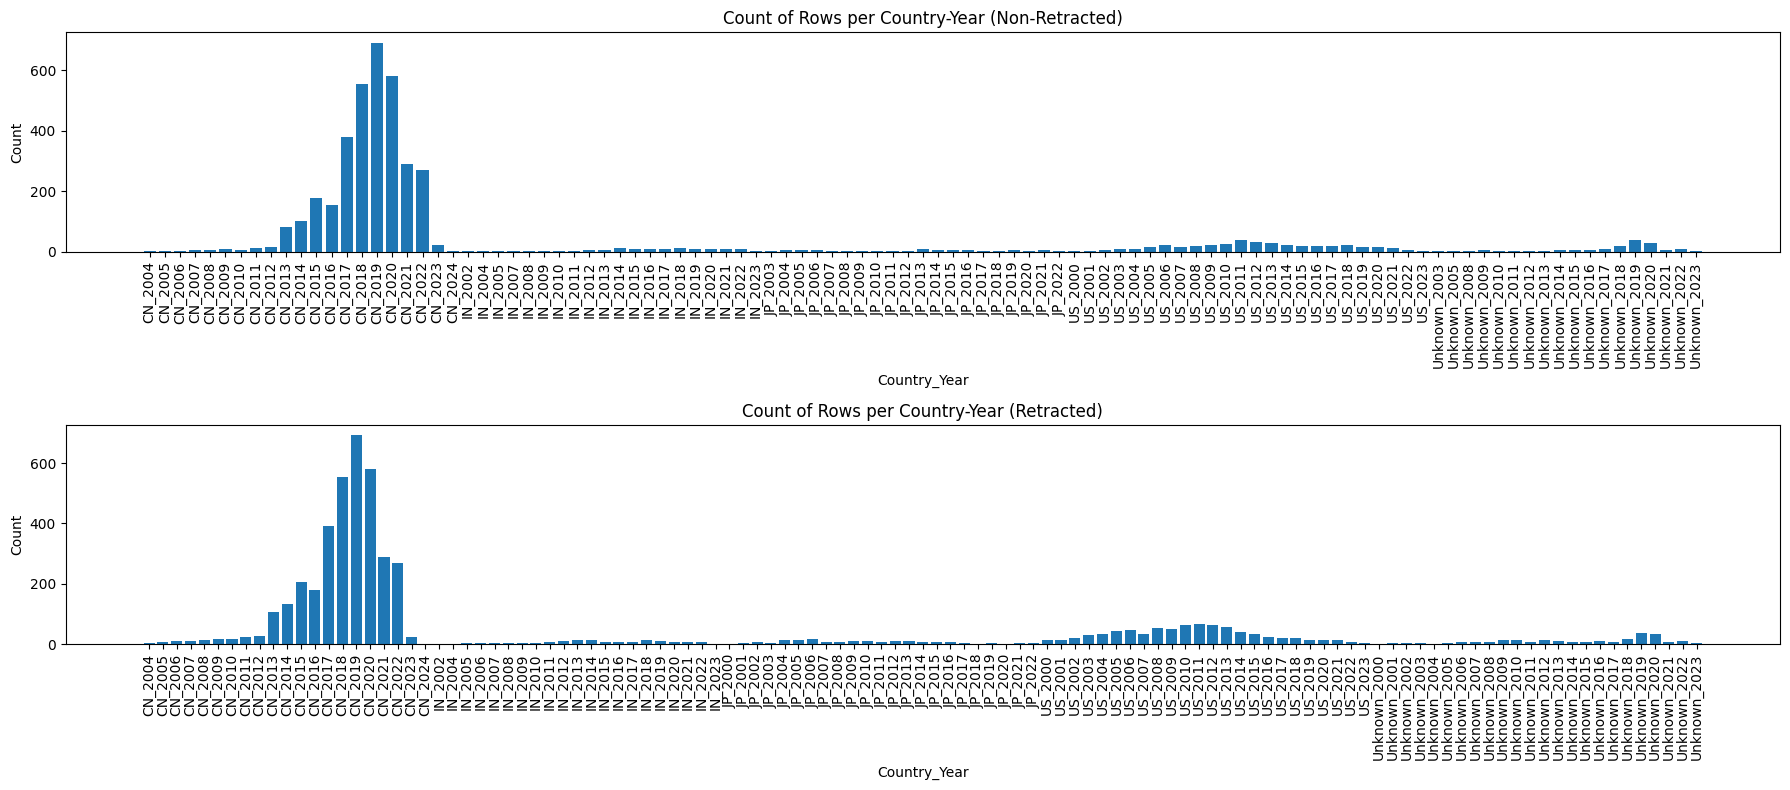

In [8]:

# Filter out papers before 2000

cleaned_nonretracted_df = cleaned_nonretracted_df[cleaned_nonretracted_df['year'] >= 2000]
cleaned_retracted_df = cleaned_retracted_df[cleaned_retracted_df['year'] >= 2000]

# Calculate counts per year per country for nonretracted dataframe

nonretracted_counts = cleaned_nonretracted_df.groupby(['country', 'year']).size().reset_index(name='count')

# Calculate counts per year per country for retracted dataframe

retracted_counts = cleaned_retracted_df.groupby(['country', 'year']).size().reset_index(name='count')

# Select top 5 countries with the highest counts

top_nonretracted_countries = nonretracted_counts.groupby('country').sum().nlargest(5, 'count').index
top_retracted_countries = retracted_counts.groupby('country').sum().nlargest(5, 'count').index

# Filter dataframes to include only top 5 countries

filtered_nonretracted_df = nonretracted_counts[nonretracted_counts['country'].isin(top_nonretracted_countries)]
filtered_retracted_df = retracted_counts[retracted_counts['country'].isin(top_retracted_countries)]

# Plotting cleaned_nonretracted_df

plt.figure(figsize=(18, 8))

# First subplot for cleaned_nonretracted_df
plt.subplot(2, 1, 1)
plt.bar(filtered_nonretracted_df['country'] + '_' + filtered_nonretracted_df['year'].astype(str), filtered_nonretracted_df['count'])
plt.title('Count of Rows per Country-Year (Non-Retracted)')
plt.xlabel('Country_Year')
plt.ylabel('Count')
plt.xticks(rotation=90)

# Second subplot for cleaned_retracted_df

plt.subplot(2, 1, 2)
plt.bar(filtered_retracted_df['country'] + '_' + filtered_retracted_df['year'].astype(str), filtered_retracted_df['count'])
plt.title('Count of Rows per Country-Year (Retracted)')
plt.xlabel('Country_Year')
plt.ylabel('Count')
plt.xticks(rotation=90)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [9]:

# Filter out papers before 2000
cleaned_nonretracted_df = cleaned_nonretracted_df[cleaned_nonretracted_df['year'] >= 2000]
cleaned_retracted_df = cleaned_retracted_df[cleaned_retracted_df['year'] >= 2000]

# Calculate counts per year per country for nonretracted dataframe
nonretracted_counts = cleaned_nonretracted_df.groupby(['country', 'year']).size().reset_index(name='nonretracted_count')

# Calculate counts per year per country for retracted dataframe
retracted_counts = cleaned_retracted_df.groupby(['country', 'year']).size().reset_index(name='retracted_count')

# Merge the dataframes
merged_df = nonretracted_counts.merge(retracted_counts, on=['country', 'year'], how='outer').fillna(0)

# Calculate the difference
merged_df['difference'] = merged_df['nonretracted_count'] - merged_df['retracted_count']

# Count occurrences per year for retracted dataframe
retracted_counts_per_year = cleaned_retracted_df.groupby('year').size().reset_index(name='retracted_count')

# Merge with the country information
retracted_counts_per_year = retracted_counts_per_year.merge(cleaned_retracted_df[['year', 'country']], on='year', how='left')

# Calculate total retracted count per country and sort
sorted_countries = retracted_counts_per_year.groupby('country')['retracted_count'].sum().sort_values(ascending=False).index

# Create a dataframe for sorted countries
sorted_df = pd.DataFrame({'country': sorted_countries})

# Merge with original dataframe to retain country-year information
final_df = sorted_df.merge(merged_df, on='country', how='left')

# Display the dataframe
final_df.head(50)



,country,year,nonretracted_count,retracted_count,difference
0,CN,2004,1.0,3.0,-2.0
1,CN,2005,3.0,8.0,-5.0
2,CN,2006,2.0,9.0,-7.0
3,CN,2007,5.0,9.0,-4.0
4,CN,2008,5.0,15.0,-10.0
5,CN,2009,8.0,17.0,-9.0
6,CN,2010,5.0,16.0,-11.0
7,CN,2011,13.0,24.0,-11.0
8,CN,2012,14.0,28.0,-14.0
9,CN,2013,82.0,106.0,-24.0
